# NLP First Step
# Preprocessing

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [2]:
# downloads sample twitter dataset. uncomment the line below if running on a local machine.
nltk.download('twitter_samples')

# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
print(all_positive_tweets)
print(all_negative_tweets)
print(len(all_positive_tweets))
print(len(all_negative_tweets))

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katam

In [4]:
def check_func():
  checking_tweet = all_positive_tweets[1234]
  print(checking_tweet)
check_func()

@leomanaids_ look here u little shit :-) I fell asleep &amp; then woke up &amp; thought u were asleep :-) PLUS this was earlier :-) so fuk u dude


In [5]:
import pandas as pd


In [6]:
pos_df = pd.DataFrame(all_positive_tweets)
neg_df = pd.DataFrame(all_negative_tweets)
pos_df.head()
neg_df.head()

,0
0,hopeless for tmr :(
1,Everything in the kids section of IKEA is so c...
2,@Hegelbon That heart sliding into the waste ba...
3,"“@ketchBurning: I hate Japanese call him ""bani..."
4,"Dang starting next week I have ""work"" :("


# Punctuation, Retweet Symbol, Special Characters, URL, Hashtag, LowerCase

In [7]:
pos_df[0] = pos_df[0].str.replace(r'[^\w\s]+', '')
neg_df[0] = neg_df[0].str.replace(r'[^\w\s]+', '')


# Remove retweet text RT
pattern = re.compile(r'^RT[\s]+')
pos_df[0] = [pattern.sub('', x) for x in pos_df[0].tolist()]
neg_df[0] = [pattern.sub('', x) for x in neg_df[0].tolist()]

# Remove URL
pattern = re.compile(r'^RT[\s]+')
pos_df[0] = [pattern.sub('', x) for x in pos_df[0].tolist()]
neg_df[0] = [pattern.sub('', x) for x in neg_df[0].tolist()]

# Remove Hashtag
pattern = re.compile(r'#')
pos_df[0] = [pattern.sub('', x) for x in pos_df[0].tolist()]
neg_df[0] = [pattern.sub('', x) for x in neg_df[0].tolist()]

#Lowercase
pos_df[0] = pos_df[0].str.lower()
neg_df[0] = neg_df[0].str.lower()

pos_df.head()
neg_df.head()

,0
0,hopeless for tmr
1,everything in the kids section of ikea is so c...
2,hegelbon that heart sliding into the waste bas...
3,ketchburning i hate japanese call him bani \n...
4,dang starting next week i have work


# Stopwords

In [8]:
STOPWORDS = set(stopwords.words('english'))
# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Applying the stopwords to 'text_punct' and store into 'text_stop'
pos_df[0] = pos_df[0].apply(stopwords)
neg_df[0] = neg_df[0].apply(stopwords)

pos_df.head()
neg_df.head()

,0
0,hopeless tmr
1,everything kids section ikea cute shame im nea...
2,hegelbon heart sliding waste basket
3,ketchburning hate japanese call bani
4,dang starting next week work


# Remove Emoji

In [9]:
# Function to remove emoji.
def remove_emoji(string):
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', string)

pos_df[0] = pos_df[0].apply(remove_emoji)
neg_df[0] = neg_df[0].apply(remove_emoji)

pos_df.head()
neg_df.head()

,0
0,hopeless tmr
1,everything kids section ikea cute shame im nea...
2,hegelbon heart sliding waste basket
3,ketchburning hate japanese call bani
4,dang starting next week work


# Porter Stemming

In [10]:
Pstemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [Pstemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

pos_df['tweet_stem'] = pos_df[0].apply(stem_sentences)
#pos_df = pos_df.drop(columns=[0]) # Get rid of the unstemmed column.
neg_df['tweet_stem'] = neg_df[0].apply(stem_sentences)
#neg_df = neg_df.drop(columns=[0]) # Get rid of the unstemmed column.

pos_df.head()
neg_df.head()

,0,tweet_stem
0,hopeless tmr,hopeless tmr
1,everything kids section ikea cute shame im nea...,everyth kid section ikea cute shame im nearli ...
2,hegelbon heart sliding waste basket,hegelbon heart slide wast basket
3,ketchburning hate japanese call bani,ketchburn hate japanes call bani
4,dang starting next week work,dang start next week work


# Lemmatization

In [11]:
import spacy
nlp = spacy.load("en", disable=['tagger', 'parser', 'ner'])
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [12]:

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_) for tok in doc
                  if tok.is_alpha] 
    return ' '.join(lemma_list)

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

In [13]:
# %%time
# pos_df['tweet_lemma'] = preprocess_pipe(pos_df[0])
# neg_df['tweet_lemma'] = preprocess_pipe(neg_df[0])

In [14]:
!pip install joblib
from joblib import Parallel, delayed

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, length_of_dataset, chunksize=100):
    executor = Parallel(n_jobs=7, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, length_of_dataset, chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)

In [15]:
%%time
pos_df['tweet_lemma_parallel'] = preprocess_parallel(pos_df[0], len(pos_df), chunksize=1000)


CPU times: user 1.31 s, sys: 213 ms, total: 1.52 s
Wall time: 4min 40s


In [16]:
pos_df.head()

,0,tweet_stem,tweet_lemma_parallel
0,followfriday france_inte pkuchly57 milipol_par...,followfriday france_int pkuchly57 milipol_pari...,followfriday top engage member community week
1,lamb2ja hey james odd please call contact cent...,lamb2ja hey jame odd pleas call contact centr ...,hey james odd please call contact centre able ...
2,despiteofficial listen last night bleed amazin...,despiteoffici listen last night bleed amaz tra...,despiteofficial listen last night bleed amaze ...
3,97sides congrats,97side congrat,congrats
4,yeaaaah yippppy accnt verified rqst succeed go...,yeaaaah yippppi accnt verifi rqst succeed got ...,yeaaaah yippppy accnt verify rqst succeed get ...


In [17]:
neg_df['tweet_lemma_parallel'] = preprocess_parallel(neg_df[0], len(neg_df), chunksize=1000)

In [18]:
neg_df.head()

,0,tweet_stem,tweet_lemma_parallel
0,hopeless tmr,hopeless tmr,hopeless tmr
1,everything kids section ikea cute shame im nea...,everyth kid section ikea cute shame im nearli ...,everything kid section ikea cute shame -PRON- ...
2,hegelbon heart sliding waste basket,hegelbon heart slide wast basket,hegelbon heart slide waste basket
3,ketchburning hate japanese call bani,ketchburn hate japanes call bani,ketchburning hate japanese call bani
4,dang starting next week work,dang start next week work,dang start next week work


In [19]:
neg_df['polarity']=0
pos_df['polarity']=1
pos_df.head()

,0,tweet_stem,tweet_lemma_parallel,polarity
0,followfriday france_inte pkuchly57 milipol_par...,followfriday france_int pkuchly57 milipol_pari...,followfriday top engage member community week,1
1,lamb2ja hey james odd please call contact cent...,lamb2ja hey jame odd pleas call contact centr ...,hey james odd please call contact centre able ...,1
2,despiteofficial listen last night bleed amazin...,despiteoffici listen last night bleed amaz tra...,despiteofficial listen last night bleed amaze ...,1
3,97sides congrats,97side congrat,congrats,1
4,yeaaaah yippppy accnt verified rqst succeed go...,yeaaaah yippppi accnt verifi rqst succeed got ...,yeaaaah yippppy accnt verify rqst succeed get ...,1


**Create one dataset**

In [23]:
df = pd.DataFrame()
df = df.append(pos_df)
df = df.append(neg_df)
print(df.shape)
df.head()

(10000, 4)


,0,tweet_stem,tweet_lemma_parallel,polarity
0,followfriday france_inte pkuchly57 milipol_par...,followfriday france_int pkuchly57 milipol_pari...,followfriday top engage member community week,1
1,lamb2ja hey james odd please call contact cent...,lamb2ja hey jame odd pleas call contact centr ...,hey james odd please call contact centre able ...,1
2,despiteofficial listen last night bleed amazin...,despiteoffici listen last night bleed amaz tra...,despiteofficial listen last night bleed amaze ...,1
3,97sides congrats,97side congrat,congrats,1
4,yeaaaah yippppy accnt verified rqst succeed go...,yeaaaah yippppi accnt verifi rqst succeed got ...,yeaaaah yippppy accnt verify rqst succeed get ...,1


# **Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split
sentences = df['tweet_stem']
labels = df['polarity']
train_x, valid_x, train_y, valid_y = train_test_split(sentences,labels, test_size = 0.20, random_state = 21)


# **Label Encoder**

**Not necessary for 0 & 1 binary classes (No harm in using)**<br/>
Specially needed for multi-classes

In [27]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# **Feature Extraction**

**Count Vectorizer**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(sentences)
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)
print(xtrain_count.toarray())
print(count_vect.get_feature_names())
xtrain_count

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['0', '00', '0001', '00128835', '009', '00962778381838', '00kouhey00', '0100', '0115am', '0116am', '01282', '0129ann', '01482', '02', '02079', '02392441234', '0272', '0330', '0345', '0388', '0430alexu', '0702am', '071', '0717am', '0717pm', '0724pm', '0725pm', '0732pm', '0734am', '0878', '089624641747', '0lliebudz', '0plate', '1', '10', '100', '1000', '10000', '100k', '100reasonstovisitmombasa', '100time', '101', '1010', '1010hoshi1010', '1016', '1017', '1017nell', '1020', '1030', '1031genfmsbi', '1033', '103k', '1057darwin', '1059', '1093', '10am', '10th', '10x12', '11', '110', '1100', '1100d', '111', '1111', '1115am2hour', '112', '1125am', '1190', '11am', '11am4pm', '11h', '11pm', '12', '120', '1200', '12000', '121st', '1234mania', '123greetingscom', '1277', '12pm', '12th', '13', '130', '1300', '132', '1399', '13m', '13mesh', '13th', '14', '1400', '144p', '1451834461

<8000x19068 sparse matrix of type '<class 'numpy.int64'>'
	with 51751 stored elements in Compressed Sparse Row format>

**Tf-Idf Vectorizer**

In [38]:
# word
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=1000000)
tfidf_vect.fit(sentences)
print(tfidf_vect.get_params()) #Check parameters
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features=1000000)
tfidf_vect_ngram.fit(sentences)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


# characters
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=1000000)
tfidf_vect_ngram_chars.fit(sentences)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

print(tfidf_vect_ngram_chars.get_feature_names()) #Check Feature Names

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 1000000, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


[' ', ' 0', ' 0 ', ' 00', ' 01', ' 02', ' 03', ' 07', ' 08', ' 1', ' 1 ', ' 10', ' 11', ' 12', ' 13', ' 14', ' 15', ' 16', ' 17', ' 18', ' 19', ' 1c', ' 1d', ' 1h', ' 1k', ' 1l', ' 1n', ' 1p', ' 1s', ' 1t', ' 2', ' 2 ', ' 20', ' 21', ' 22', ' 23', ' 24', ' 25', ' 26', ' 28', ' 29', ' 2a', ' 2e', ' 2f', ' 2h', ' 2i', ' 2k', ' 2n', ' 2w', ' 3', ' 3 ', ' 30', ' 31', ' 32', ' 33', ' 34', ' 35', ' 36', ' 3a', ' 3d', ' 3g', ' 3k', ' 3o', ' 3p', ' 3r', ' 3y', ' 4', ' 4 ', ' 40', ' 41', ' 42', ' 43', ' 44', ' 45', ' 46', ' 49', ' 4a', ' 4h', ' 4m', ' 4p', ' 4t', ' 5', ' 5 ', ' 50', ' 51', ' 53', ' 58', ' 59', ' 5a', ' 5e', ' 5m', ' 5p', ' 5s', ' 5t', ' 6', ' 6 ', ' 60', ' 61', ' 62', ' 63', ' 64', ' 65', ' 67', ' 68', ' 6a', ' 6g', ' 6p', ' 6t', ' 6y', ' 7', ' 7 ', ' 70', ' 72', ' 73', ' 74', ' 75', ' 76', ' 77', ' 78', ' 79', ' 7a', ' 7d', ' 7e', ' 7p', ' 7t', ' 8', ' 8 ', ' 80', ' 84', ' 86', ' 87', ' 89', ' 8b', ' 8p', ' 8t', ' 9', ' 9 ', ' 90', ' 91', ' 92', ' 93', ' 94', ' 95', ' 96', ' 9

# **Training Model and Plot Precision vs Recall**

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    #print(predictions)

    #Confusion Matrix
    print("\n\nConfusion Matrix")
    cm = confusion_matrix(valid_y,predictions);
    print(cm)
    
    #Confusion Matrix in Detail
    report = classification_report(valid_y,predictions)
    print("\n\n")
    print(report)

    ######################
    disp = plot_precision_recall_curve(classifier, feature_vector_valid, valid_y)
    #disp.ax_.set_title('2-class Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))

   
    
    return metrics.accuracy_score(predictions, valid_y)

# **Apply Logistic Regression**



Confusion Matrix
[[814 183]
 [299 704]]



              precision    recall  f1-score   support

           0       0.73      0.82      0.77       997
           1       0.79      0.70      0.74      1003

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LR, Count Vectors:  0.759


Confusion Matrix
[[747 250]
 [262 741]]



              precision    recall  f1-score   support

           0       0.74      0.75      0.74       997
           1       0.75      0.74      0.74      1003

    accuracy                           0.74      2000
   macro avg 

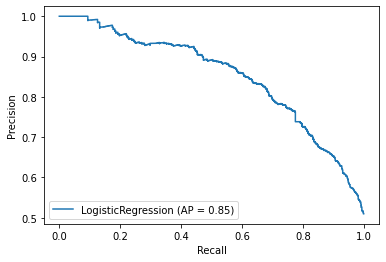

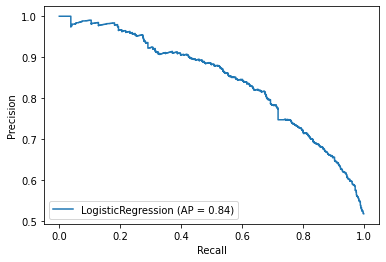

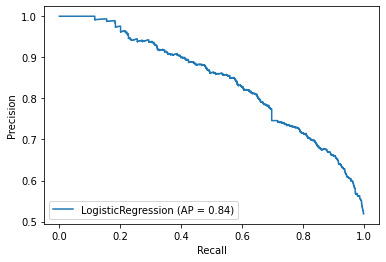

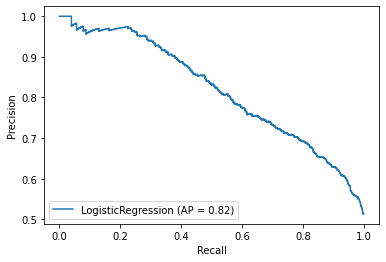

In [40]:
from sklearn import linear_model

# Logistic Regression / Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print(linear_model.LogisticRegression())
print ("LR, Count Vectors: ", accuracy)

# Logistic Regression on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Logistic Regression on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)